In [17]:
import pandas as pd

# 1. อ่านไฟล์ u.data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv("u.data", sep="\t", names=column_names)
print(data.head())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [19]:
# 2. อ่านไฟล์ u.item
item_columns = [
    'item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

movies = pd.read_csv("u.item", sep="|", names=item_columns, encoding="latin-1")


print(movies.head(5))

   item_id        movie_title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0   
1 

In [20]:
# 3. อ่านไฟล์ u.user
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv("u.user", sep="|", names=user_columns)

print(users.head(5))


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [22]:
# 4. รวมข้อมูล ratings + movies (เชื่อมด้วย item_id)
ratings_movies = pd.merge(data, movies[['item_id','movie_title','release_date']], on='item_id')

# 5. รวมข้อมูล ratings_movies + users (เชื่อมด้วย user_id)
final_data = pd.merge(ratings_movies, users[['user_id','age','gender','occupation']], on='user_id')

# แสดงผล
print(final_data.head())

   user_id  item_id  rating  timestamp                 movie_title  \
0      196      242       3  881250949                Kolya (1996)   
1      186      302       3  891717742    L.A. Confidential (1997)   
2       22      377       1  878887116         Heavyweights (1994)   
3      244       51       2  880606923  Legends of the Fall (1994)   
4      166      346       1  886397596         Jackie Brown (1997)   

  release_date  age gender  occupation  
0  24-Jan-1997   49      M      writer  
1  01-Jan-1997   39      F   executive  
2  01-Jan-1994   25      M      writer  
3  01-Jan-1994   28      M  technician  
4  01-Jan-1997   47      M    educator  


จำนวนเรคอร์ดซ้ำ (user_id,item_id): 0


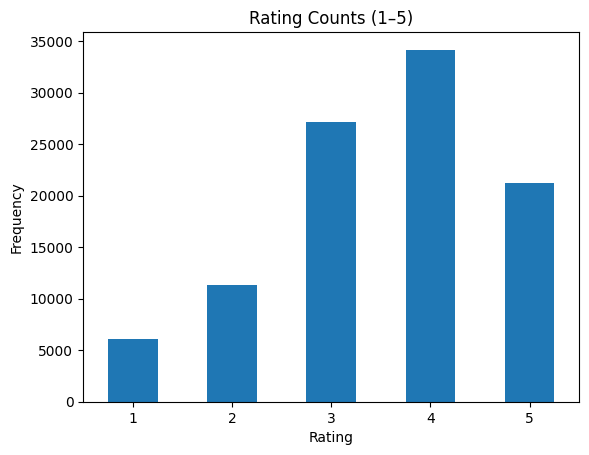

ค่าเฉลี่ย rating ทั้งหมด: 3.53
เฉลี่ยตามเพศ:
 gender
F    3.532
M    3.529
Name: rating, dtype: float64
                                                        mean  count
movie_title                                                        
Close Shave, A (1995)                               4.491071    112
Schindler's List (1993)                             4.466443    298
Wrong Trousers, The (1993)                          4.466102    118
Casablanca (1942)                                   4.456790    243
Wallace & Gromit: The Best of Aardman Animation...  4.447761     67
Shawshank Redemption, The (1994)                    4.445230    283
Rear Window (1954)                                  4.387560    209
Usual Suspects, The (1995)                          4.385768    267
Star Wars (1977)                                    4.358491    583
12 Angry Men (1957)                                 4.344000    125
Users=943, Items=1682, Ratings=100000, Density=6.3047%


In [32]:
# --- Data Validation & Quick EDA ---

# 1) ช่วงค่า rating ต้องเป็น 1..5 และเป็นจำนวนเต็ม
assert final_data['rating'].between(1,5).all(), "พบ rating นอกช่วง 1–5"
final_data['rating'] = final_data['rating'].astype(int)

# 2) ไม่มี missing ที่คีย์สำคัญ
assert final_data[['user_id','item_id','rating']].notna().all().all(), "พบ missing ในคีย์สำคัญ"

# 3) ตรวจ duplicate เรคอร์ด (user_id, item_id) เดียวกันหลายแถว
dups = final_data.duplicated(subset=['user_id','item_id'], keep=False).sum()
print(f"จำนวนเรคอร์ดซ้ำ (user_id,item_id): {dups}")

# 4) แปลงเวลา
import pandas as pd, matplotlib.pyplot as plt
final_data['datetime'] = pd.to_datetime(final_data['timestamp'], unit='s')

# 5) นับความถี่แต่ละคะแนนและพล็อตให้ล็อกที่ 1..5
counts = final_data['rating'].value_counts().reindex([1,2,3,4,5], fill_value=0)

plt.figure()
counts.plot(kind='bar')
plt.title('Rating Counts (1–5)')
plt.xlabel('Rating'); plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 6) สถิติเบื้องต้น
print("ค่าเฉลี่ย rating ทั้งหมด:", final_data['rating'].mean().round(3))
print("เฉลี่ยตามเพศ:\n", final_data.groupby('gender')['rating'].mean().round(3))

# 7) Top movies แบบมีเกณฑ์จำนวนโหวตขั้นต่ำ (กันค่าเฉลี่ยลวง)
vc = final_data['movie_title'].value_counts()
min_votes = 50
top_mean = (final_data.groupby('movie_title')['rating']
            .agg(['mean','count'])
            .query('count >= @min_votes')
            .sort_values(['mean','count'], ascending=[False, False])
            .head(10))
print(top_mean)

# 8) อัตราความหนาแน่น (sparseness) ของ user–item matrix (มีผลต่อวิธีเลือกโมเดล)
n_users = final_data['user_id'].nunique()
n_items = final_data['item_id'].nunique()
n_ratings = len(final_data)
density = n_ratings / (n_users * n_items)
print(f"Users={n_users}, Items={n_items}, Ratings={n_ratings}, Density={density:.4%}")
